In [1]:
from bs4 import BeautifulSoup
import requests
import re
import urllib2
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pylab as pl
%matplotlib inline

In [ ]:
def get_soup(url):
    return BeautifulSoup(requests.get(url).text)

image_type = "cat"
query = "cat"
url = "http://www.bing.com/images/search?q=" + query + \
    "&qft=+filterui:color2-bw+filterui:imagesize-large&FORM=R5IR3"

soup = get_soup(url)
images = [a['src'] for a in soup.find_all("img", {"src": re.compile("mm.bing.net")})]

for img in images:
    raw_img = urllib2.urlopen(img).read()
    cntr = len([i for i in os.listdir("/Users/8201/PROJECTS/Learning/Image classification/Cats and houses") if image_type in i]) + 1
    f = open("/Users/8201/PROJECTS/Learning/Image classification/Cats and houses/" + image_type + "_"+ str(cntr), 'wb')
    f.write(raw_img)
    f.close()

In [2]:
STANDARD_SIZE = (300, 167)
def img_to_matrix(filename, verbose=False):
#    takes a filename and turns it into a numpy array of RGB pixels
    img = Image.open(filename)
    if verbose==True:
        print "changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
#    takes in an (m, n) numpy array and flattens it into an array of shape (1, m * n)
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [3]:
img_dir = "/Users/8201/PROJECTS/Learning/Image classification/Cats and houses/"
images = [img_dir+ f for f in os.listdir(img_dir)]
labels = ["house" if "house" in f.split('/')[-1] else "cat" for f in images]

data = []
for image in images:
    img = img_to_matrix(image)
    img = flatten_image(img)
    data.append(img)

data = np.array(data)
data

array([[221, 221, 221, ..., 221, 221, 221],
       [224, 224, 224, ..., 225, 225, 225],
       [223, 223, 223, ..., 221, 221, 221],
       ...,
       [226, 226, 226, ..., 221, 221, 221],
       [221, 221, 221, ..., 221, 221, 221],
       [221, 221, 221, ..., 221, 221, 221]])

In [4]:
is_train = np.random.uniform(0, 1, len(data)) <= 0.7
y = np.where(np.array(labels)=="house", 1, 0)

train_x, train_y = data[is_train], y[is_train]
test_x, test_y = data[is_train==False], y[is_train==False]

/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


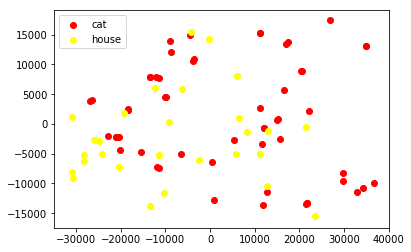

In [5]:
pca = RandomizedPCA(n_components=2)
X = pca.fit_transform(data)
df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label":np.where(y==1, "house", "cat")})
colors = ["red", "yellow"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

In [6]:
pca = RandomizedPCA(n_components=5)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
pd.crosstab(test_y, knn.predict(test_x), rownames=["Actual"], colnames=["Predicted"])

Predicted   0  1
Actual          
0          13  6
1           1  6

In [9]:
rf=RandomForestClassifier(n_estimators=50,n_jobs=-1,class_weight='balanced',max_depth=5)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [10]:
pd.crosstab(test_y, rf.predict(test_x), rownames=["Actual"], colnames=["Predicted"])

Predicted   0  1
Actual          
0          13  6
1           3  4

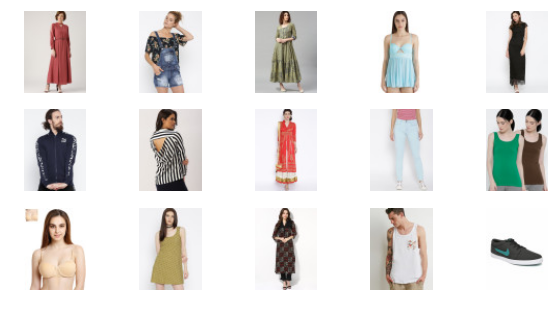

In [12]:
%matplotlib inline
import requests
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

styleids=[1813548,1806026,1752836,1954004,948382,1483727,1710441,1319876,1622479,1657769,1313681,1385666,1695531,1822389,1719456]

num_rows = 3
num_cols = 5

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2)

ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
gs.update(hspace=0.2)
#gs.tight_layout(fig, h_pad=0,w_pad=0)

i=0
for styleid in styleids: 
    # download image and read
    r = requests.get(url='http://developer.myntra.com/style/' + str(styleid)).json()
    imageURL = r['data']['styleImages']['default']['imageURL'].replace('assets.myntassets.com/', 'assets.myntassets.com/w_60/')
    urllib.urlretrieve(imageURL, 'data/' + str(styleid) + '.jpg')
    image = mpimg.imread('data/' + str(styleid) + '.jpg')
    
    # predict what type is it

    # visualize prediction
    ax[i].imshow(image)
    ax[i].axis('off')
    i=i+1
plt.show()

In [8]:
for i in range(num_rows*num_cols):
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
